# Unsupervised Learning

## Unsupervised preprocessing followed by classification:
1. preprocessing with K-Means algorithm
2. classification with Logistic Regression

Goal: improvement of classification performance

In [46]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression

In [47]:
#digits dataset is a simple MNIST-like dataset containing 1,797 grayscale 8×8 images representing digits 0 to 9.

In [ ]:
#classes=10; samples per class: ~180; samples total=1797; dimensionality=64; features=integers 0-16

In [48]:
X_digits, y_digits = load_digits(return_X_y=True)  #digits dataset

In [49]:
#inspect dataset: start

In [50]:
X_digits.shape

(1797, 64)

In [51]:
np.max(X_digits, axis=0)  #max values for each of the 64 columns

array([ 0.,  8., 16., 16., 16., 16., 16., 15.,  2., 16., 16., 16., 16.,
       16., 16., 12.,  2., 16., 16., 16., 16., 16., 16.,  8.,  1., 15.,
       16., 16., 16., 16., 15.,  1.,  0., 14., 16., 16., 16., 16., 14.,
        0.,  4., 16., 16., 16., 16., 16., 16.,  6.,  8., 16., 16., 16.,
       16., 16., 16., 13.,  1.,  9., 16., 16., 16., 16., 16., 16.])

In [52]:
X_digits[0].reshape(8,8)  #one 8×8 grayscale image

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [53]:
y_digits[0]  #target digit

0

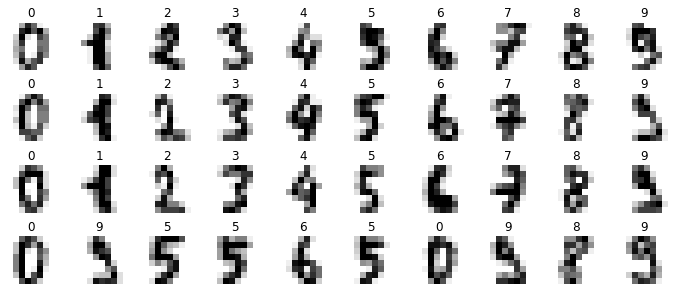

In [54]:
import matplotlib.pyplot as plt

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_digits[index].reshape(8,8), cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_digits[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

In [55]:
#inspect dataset: end

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [57]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [58]:
log_reg.score(X_test, y_test)  #baseline accuracy

0.9688888888888889

### create a pipeline:
1. cluster the training set into 50 clusters and replace the images with their distances to the 50 clusters
2. apply logistic regression model

In [59]:
from sklearn.pipeline import Pipeline

In [60]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),  #choose number of clusters in advance
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])

In [61]:
pipeline.fit(X_train, y_train)  #call sequence of estimators: transformer on "kmeans" and fit on "log_reg"

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [62]:
pipeline.score(X_test, y_test)  #clustering improves accuracy; prerequisite: set the number of clusters for kmean

0.98

In [63]:
#cross-check pipeline: start

In [64]:
kmeans = KMeans(n_clusters=50, random_state=42)  #predetermined number_of_centroids = 50

In [65]:
km = kmeans.fit(X_train)  #determine centroids

In [66]:
km.inertia_  #performance metric called inertia: mean squared distance between each instance and its closest centroid

533708.4794319809

In [67]:
km.score(X_train)  #score() method returns the negative inertia; "greater is better” rule: the smaller the interia, the larger the score

-533708.4794319809

In [68]:
km_tf_train = km.transform(X_train)  #distance from each instance to every centroid

In [69]:
log_reg.fit(km_tf_train, y_train)  #train classifier

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [70]:
km_tf_test = km.transform(X_test)   #distance from each instance to every centroid

In [71]:
log_reg.score(km_tf_test, y_test)  #return mean accuracy on the given test data and labels.

0.98

In [72]:
#cross-check pipeline: end

### grid search: find optimal number of clusters using classification performance metric

In [17]:
from sklearn.model_selection import GridSearchCV

In [19]:
#parameters of the estimators in the pipeline can be accessed using the <estimator>__<parameter> syntax
param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. kmeans__n_clusters=2, total=   0.4s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ............................. kmeans__n_clusters=2, total=   0.4s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.4s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.5s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.5s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.5s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.6s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.6s
[CV] kmeans__n_clusters=4 ............................................
[CV] .

[CV] ............................ kmeans__n_clusters=21, total=   6.1s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   6.4s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   7.7s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   7.4s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   7.4s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   8.4s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   7.0s
[CV] kmeans__n_clusters=24 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=41, total=   9.5s
[CV] kmeans__n_clusters=41 ...........................................
[CV] ............................ kmeans__n_clusters=41, total=   9.2s
[CV] kmeans__n_clusters=41 ...........................................
[CV] ............................ kmeans__n_clusters=41, total=   9.8s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=  10.1s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=  10.4s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=  16.1s
[CV] kmeans__n_clusters=43 ...........................................
[CV] ............................ kmeans__n_clusters=43, total=  12.6s
[CV] kmeans__n_clusters=43 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=60, total=  12.7s
[CV] kmeans__n_clusters=60 ...........................................
[CV] ............................ kmeans__n_clusters=60, total=  18.8s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=  39.2s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=  12.6s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=  10.4s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=  11.2s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=  13.5s
[CV] kmeans__n_clusters=62 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=79, total=  11.7s
[CV] kmeans__n_clusters=80 ...........................................
[CV] ............................ kmeans__n_clusters=80, total=  11.1s
[CV] kmeans__n_clusters=80 ...........................................
[CV] ............................ kmeans__n_clusters=80, total=  11.8s
[CV] kmeans__n_clusters=80 ...........................................
[CV] ............................ kmeans__n_clusters=80, total=  10.8s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=  10.6s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=  13.7s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=  11.4s
[CV] kmeans__n_clusters=82 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=99, total=  11.5s
[CV] kmeans__n_clusters=99 ...........................................
[CV] ............................ kmeans__n_clusters=99, total=  11.8s
[CV] kmeans__n_clusters=99 ...........................................
[CV] ............................ kmeans__n_clusters=99, total=  11.0s


[Parallel(n_jobs=1)]: Done 294 out of 294 | elapsed: 70.6min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [20]:
grid_clf.best_params_

{'kmeans__n_clusters': 57}

In [21]:
grid_clf.score(X_test, y_test)

0.98